In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
from scipy.stats import linregress

from api_keys import api_key

In [2]:
polling_class_df  = pd.read_csv("ClassSuperHeroesPicks.csv")
polling_jordan_df = pd.read_csv("JordanSuperHeroesPicks.csv")
polling_mikhail_df = pd.read_csv("responses_538.csv")
polling_josh_df = pd.read_csv("JoshNetworkSuperHeroesPicks.csv")
comic_book_sales_df = pd.read_csv("utf8sales.csv")


polling_class_df.drop(columns="Unnamed: 7", index=0, inplace=True)
polling_class_df.reset_index(drop=True,inplace=True)
polling_class_df


polling_jordan_df
polling_mikhail_df
polling_josh_df
polling_class_df


#groupedSales  = comic_book_sales_df.groupby("Comic-book Title").agg
#groupedSales


comic_book_sales_df["Est. Units"] = comic_book_sales_df["Est. Units"].str.replace(',','').astype(float)
gross = comic_book_sales_df["Price"].str.replace('$','').astype(float) * comic_book_sales_df["Est. Units"] 
comic_book_sales_df["Gross"] = gross

comic_book_sales_df.head()



,Publication Year,Comic-book Title,# of Issues,Price,Publisher,Est. Units,Gross
0,2009,Amazing Spider-Man,583,$3.99,Marvel,530500.0,2116695.0
1,2009,Blackest Night,1,$3.99,DC,205500.0,819945.0
2,2009,Captain America Reborn,1,$3.99,Marvel,199900.0,797601.0
3,2009,Batman and Robin,1,$2.99,DC,190300.0,568997.0
4,2009,Blackest Night,2,$3.99,DC,161400.0,643986.0


In [3]:
#groupedSales  = comic_book_sales_df.groupby("Comic-book Title")
#groupedSales


sales_data = comic_book_sales_df
Title_group = sales_data.groupby("Comic-book Title")
Total_Gross = Title_group['Gross'].sum()

Total_units = Title_group['Est. Units'].sum()

#Total_sales = Total_units*Total_units['Price']

Comic_purchases = pd.DataFrame({
    "Total Units" :  Total_units,
    "Total Sales" : Total_Gross
    })

Comic_purchases = Comic_purchases.reset_index()
Comic_purchases = Comic_purchases.rename(columns={"Comic-book Title":"name"})

Comic_purchases

,name,Total Units,Total Sales
0,100th Anniversary Special: Avengers,36605.0,146053.95
1,100th Anniversary Special: Guardians of the Ga...,41203.0,164399.97
2,100th Anniversary Special: Spider-Man,46304.0,184752.96
3,100th Anniversary Special: X-Men,40453.0,161407.47
4,1602 Witch Hunter Angela,38803.0,154823.97
...,...,...,...
1697,Yondu,25664.0,102399.36
1698,You Are Deadpool,32187.0,128426.13
1699,Young Avengers,318200.0,951418.00
1700,Young Justice,265798.0,1138058.02


In [4]:

# combined_df = pd.concat(polling_jordan_df,polling_mikhail_df,polling_josh_df,polling_class_df)
combined_df = polling_class_df.append(polling_jordan_df,).append(polling_mikhail_df).append(polling_josh_df).reset_index(drop=True)
combined_df

,Timestamp,Intelligence,Combat,Speed,Durability,Strength,Power (Non-physical)
0,2020/04/13 9:37:21 PM EST,4,5.0,5,4,5.0,5
1,2020/04/13 9:37:21 PM EST,5,5.0,5,3,4.0,5
2,2020/04/13 9:40:53 PM EST,5,2.0,4,2,2.0,4
3,2020/04/13 9:44:04 PM EST,5,4.0,3,5,4.0,5
4,2020/04/14 12:25:25 PM EST,4,4.0,5,2,2.0,1
5,2020/04/14 1:16:48 PM EST,5,3.0,3,3,4.0,5
6,2020/04/14 2:39:13 PM EST,3,1.0,5,5,4.0,2
7,2020/04/14 6:03:35 PM EST,4,3.0,1,4,3.0,3
8,2020/04/14 8:09:11 PM EST,4,3.0,2,4,4.0,5
9,2020/04/15 7:27:31 PM EST,4,5.0,5,2,3.0,5


In [5]:
base_url = "https://www.superheroapi.com/api.php/"+api_key+"/"



In [6]:
polling_jordan_df.Strength.mean()

3.526315789473684

In [7]:
# This is meaningless but cool
#polling_df[["Intelligence","Combat","Speed","Durability","Strength","Power (Non-physical)"]].plot(kind="bar")
#plt.xlabel("Attributes")
#plt.ylabel("Score")

Text(0.5, 1.0, 'Class Poll')

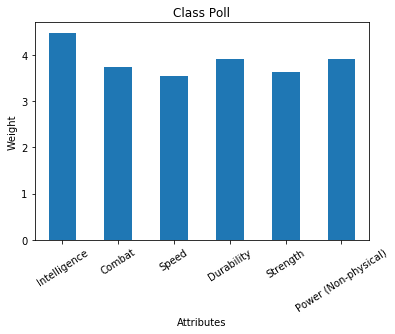

In [8]:
combined_df.mean().plot(kind="bar", rot=33)
plt.xlabel("Attributes")
plt.ylabel("Weight")
plt.title("Class Poll")

In [9]:
fullList = {}
# fullList_df = pd.DataFrame()

for id in range(1,733):
    response = requests.get(base_url + str(id)).json()
    # print(response)
    print(id)
    
    # Printing to a DataFrame was ugly
    #response_df = pd.DataFrame(response)
    #fullList_df = fullList_df.append(response_df)
    
    fullList[id] = response
    
fullList

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


{1: {'response': 'success',
  'id': '1',
  'name': 'A-Bomb',
  'powerstats': {'intelligence': '38',
   'strength': '100',
   'speed': '17',
   'durability': '80',
   'power': '24',
   'combat': '64'},
  'biography': {'full-name': 'Richard Milhouse Jones',
   'alter-egos': 'No alter egos found.',
   'aliases': ['Rick Jones'],
   'place-of-birth': 'Scarsdale, Arizona',
   'first-appearance': 'Hulk Vol 2 #2 (April, 2008) (as A-Bomb)',
   'publisher': 'Marvel Comics',
   'alignment': 'good'},
  'appearance': {'gender': 'Male',
   'race': 'Human',
   'height': ["6'8", '203 cm'],
   'weight': ['980 lb', '441 kg'],
   'eye-color': 'Yellow',
   'hair-color': 'No Hair'},
  'work': {'occupation': 'Musician, adventurer, author; formerly talk show host',
   'base': '-'},
  'connections': {'group-affiliation': 'Hulk Family; Excelsior (sponsor), Avengers (honorary member); formerly partner of the Hulk, Captain America and Captain Marvel; Teen Brigade; ally of Rom',
   'relatives': 'Marlo Chandler-Jo

In [12]:
heroes_df = pd.read_csv("totalHeroStats.csv")

#heroes_df = pd.DataFrame()
#count = 0
for id in fullList.keys():
        hero = fullList[id]
        
        
        
        print(id)
        
        heroes_df = heroes_df.append({
            "id":int(hero["id"]),
            "name":hero["name"],
            "intelligence":int(hero["powerstats"]["intelligence"]) if hero["powerstats"]["intelligence"] != "null" else None,
            "strength":int(hero["powerstats"]["strength"]) if hero["powerstats"]["strength"] != "null" else None,
            "speed":int(hero["powerstats"]["speed"]) if hero["powerstats"]["speed"] != "null" else None,
            "durability":int(hero["powerstats"]["durability"]) if hero["powerstats"]["durability"] != "null" else None,
            "power":int(hero["powerstats"]["power"]) if hero["powerstats"]["power"] != "null" else None,
            "combat":int(hero["powerstats"]["combat"]) if hero["powerstats"]["combat"] != "null" else None,
                        
            },ignore_index=True )
            
            

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [13]:
heroes_df[heroes_df.id==9]


# heroes_df[heroes_df.intelligence is Na]
# Dropping n/a values because of lack of data and THEY'RE NOT EVEN REALLY SUPERHEROES!!!!
heroes_clean_df = heroes_df.dropna().reset_index(drop=True)
heroes_clean_df

,Unnamed: 0,combat,durability,id,intelligence,name,power,speed,strength
0,0.0,64,80,1,38,A-Bomb,24,17,100
1,1.0,85,65,2,88,Abe Sapien,100,35,28
2,2.0,65,64,3,50,Abin Sur,99,53,90
3,3.0,95,90,4,63,Abomination,62,53,80
4,4.0,55,100,5,88,Abraxas,100,83,63
...,...,...,...,...,...,...,...,...,...
562,562.0,28,100,728,50,Ymir,98,27,100
563,563.0,90,25,729,88,Yoda,100,33,52
564,564.0,56,28,730,81,Zatanna,100,23,10
565,565.0,28,28,731,50,Zoom,100,100,10


In [14]:
heroes_df = pd.read_csv("totalHeroStats.csv")
heroes_df

,Unnamed: 0,combat,durability,id,intelligence,name,power,speed,strength
0,0,64,80,1,38,A-Bomb,24,17,100
1,1,85,65,2,88,Abe Sapien,100,35,28
2,2,65,64,3,50,Abin Sur,99,53,90
3,3,95,90,4,63,Abomination,62,53,80
4,4,55,100,5,88,Abraxas,100,83,63
...,...,...,...,...,...,...,...,...,...
562,562,28,100,728,50,Ymir,98,27,100
563,563,90,25,729,88,Yoda,100,33,52
564,564,56,28,730,81,Zatanna,100,23,10
565,565,28,28,731,50,Zoom,100,100,10


In [ ]:
# For writing to csv 

# DO NOT RUN!!!!!
#heroes_clean_df.to_csv("totalHeroStats.csv")
#heroes_clean_df




In [ ]:
# heroesGroupBy_df = heroes_df.groupby("name")
# len(heroesGroupBy_df)

In [15]:
# fullList[id]
# mean powerstats

norm = combined_df.mean().sum()
weights_df = combined_df.mean()/norm
weights_df


Intelligence            0.192888
Combat                  0.160590
Speed                   0.152516
Durability              0.168665
Strength                0.156677
Power (Non-physical)    0.168665
dtype: float64

In [16]:
heroes_df["Total score"] = heroes_df[[
    "intelligence",
    "combat",
    "speed",
    "durability",
    "strength",
    "power"]].dot(
weights_df.rename({
    "Intelligence": "intelligence",
    "Combat": "combat",
    "Speed": "speed",
    "Durability": "durability",
    "Strength": "strength",
    "Power (Non-physical)": "power"}).squeeze()
)
heroes_df# [["name", "Total score"]]

,Unnamed: 0,combat,durability,id,intelligence,name,power,speed,strength,Total score
0,0,64,80,1,38,A-Bomb,24,17,100,53.409101
1,1,85,65,2,88,Abe Sapien,100,35,28,68.178953
2,2,65,64,3,50,Abin Sur,99,53,90,69.759353
3,3,95,90,4,63,Abomination,62,53,80,73.662518
4,4,55,100,5,88,Abraxas,100,83,63,82.068966
...,...,...,...,...,...,...,...,...,...,...
562,562,28,100,728,50,Ymir,98,27,100,67.322135
563,563,90,25,729,88,Yoda,100,33,52,65.690540
564,564,56,28,730,81,Zatanna,100,23,10,51.280656
565,565,28,28,731,50,Zoom,100,100,10,52.548332


In [17]:
#groupedbyheroes = heroes_df.groupby("name")["Total score"].mean()
heroesDeduped = pd.DataFrame({
    "Total score" : heroes_df.groupby("name")["Total score"].mean(),
    "Intelligence" : heroes_df.groupby("name")["intelligence"].mean(),
    "Combat" : heroes_df.groupby("name")["combat"].mean(),
    "Speed" : heroes_df.groupby("name")["speed"].mean(),
    "Durability" : heroes_df.groupby("name")["durability"].mean(),
    "Power" : heroes_df.groupby("name")["power"].mean(),
    "Strength":heroes_df.groupby("name")["strength"].mean()
    
    
    })

heroesDeduped = heroesDeduped.reset_index()
#Comic_purchases = Comic_purchases.rename(columns={"Comic-book Title":"name"})

heroesDeduped

,name,Total score,Intelligence,Combat,Speed,Durability,Power,Strength
0,A-Bomb,53.409101,38.0,64.0,17.0,80.0,24.0,100.0
1,Abe Sapien,68.178953,88.0,85.0,35.0,65.0,100.0,28.0
2,Abin Sur,69.759353,50.0,65.0,53.0,64.0,99.0,90.0
3,Abomination,73.662518,63.0,95.0,53.0,90.0,62.0,80.0
4,Abraxas,82.068966,88.0,55.0,83.0,100.0,100.0,63.0
...,...,...,...,...,...,...,...,...
554,Yellowjacket II,30.996946,50.0,28.0,35.0,28.0,31.0,10.0
555,Ymir,67.322135,50.0,28.0,27.0,100.0,98.0,100.0
556,Yoda,65.690540,88.0,90.0,33.0,25.0,100.0,52.0
557,Zatanna,51.280656,81.0,56.0,23.0,28.0,100.0,10.0


In [18]:
# This is the final dataFrame which pairs comic books with sales data specifically with named heroes
salesAndPolling_df = heroesDeduped.merge(Comic_purchases,on="name")
salesAndPolling_df

,name,Total score,Intelligence,Combat,Speed,Durability,Power,Strength,Total Units,Total Sales
0,Animal Man,64.986676,56.0,80.0,47.0,85.0,73.0,48.0,727000.0,2173730.00
1,Ant-Man,40.875582,100.0,32.0,23.0,28.0,32.0,18.0,217298.0,867019.02
2,Aquaman,84.197049,81.0,80.0,79.0,80.0,100.0,85.0,2767517.0,8771702.83
3,Batgirl,50.664885,88.0,90.0,33.0,40.0,34.0,11.0,3093195.0,9670063.05
4,Batman,60.284636,90.5,95.0,28.0,52.5,55.0,33.0,15925050.0,59037750.50
...,...,...,...,...,...,...,...,...,...,...
96,Winter Soldier,55.726082,56.0,84.0,35.0,65.0,60.0,32.0,312562.0,961022.38
97,Wolverine,72.728010,63.0,100.0,50.0,100.0,89.0,32.0,3317621.0,13129631.79
98,Wonder Woman,94.482515,88.0,100.0,79.0,100.0,100.0,100.0,5491855.0,18070708.45
99,X-23,66.031572,75.0,95.0,42.0,100.0,55.0,24.0,746018.0,2783756.82


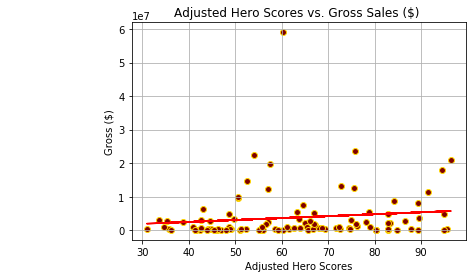

0.12851200323965584
0.20027386130268576


In [19]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Total score"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="maroon",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Adjusted Hero Scores vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Adjusted Hero Scores")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)



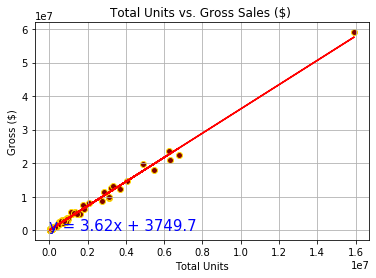

0.9968541113848532
8.124676619670735e-111


In [20]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Total Units"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="maroon",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Total Units vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Total Units")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

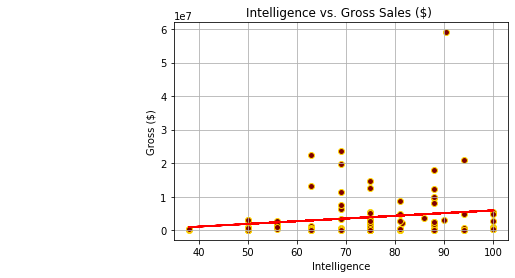

0.16517553820403008
0.09880180591700503


In [22]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Intelligence"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="maroon",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Intelligence vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Intelligence")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

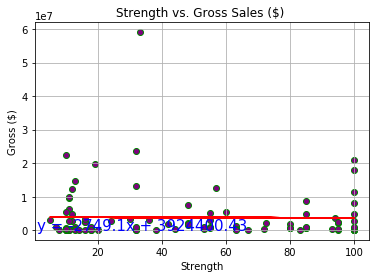

-0.01223813027342178
0.9033224903288457


In [31]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Strength"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="purple",edgecolors="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Strength vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Strength")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

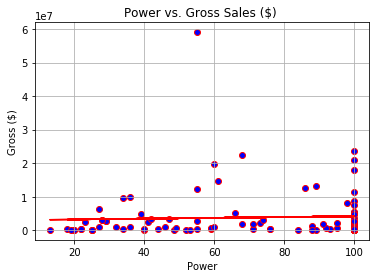

0.047026788210992584
0.6405076572076622


In [32]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Power"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="blue",edgecolors="red")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Power vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Power")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

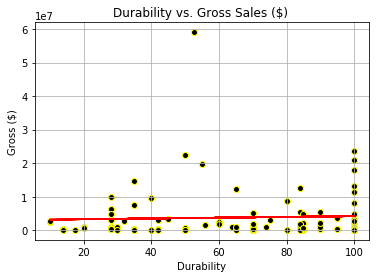

0.043856817590509
0.6632147879223271


In [34]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Durability"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="black",edgecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Durability vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Durability")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

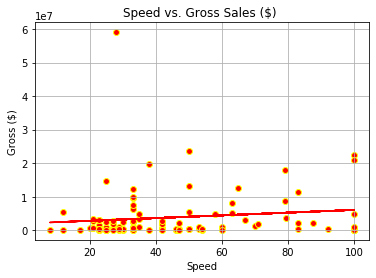

0.13092738759588485
0.19187536131018224


In [35]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Speed"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="red",edgecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Speed vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Speed")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

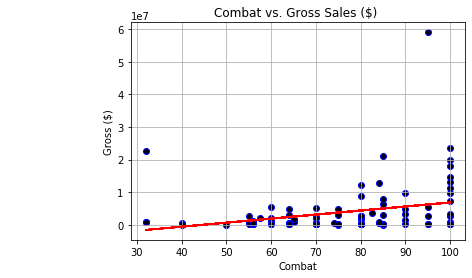

0.28640435961616606
0.0036891557682823747


In [36]:
#  Adjusted Hero Scores vs. Gross Sales ($) 
x_values = salesAndPolling_df["Combat"]
y_values = salesAndPolling_df["Total Sales"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="black",edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="blue")
plt.title("Combat vs. Gross Sales ($) ")
plt.ylabel("Gross ($)")
plt.xlabel("Combat")
plt.grid()
plt.show()

# plt.savefig("../Images/AdjVSGross")

print(rvalue)
print(pvalue)

In [ ]:
salesAndPolling_df.sort_values("Total Sales")

salesAndPolling_df.sort_values("Total score")